In [67]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from data.load_data_from_sql import connect_to_database, read_sql_to_dataframe, close_connection
from scripts.cleaner import DataCleaner
from scripts.utils import Utils

cleaner = DataCleaner()
utility = Utils()
%matplotlib inline

In [11]:
# Function to add the project path to sys.path
def add_project_path():
    """Add the project path to sys.path."""
    project_path = 'C:\\Users\\user\\Desktop\\10 acc\\Week 1\\User-Analytics-in-Telecom-Industry'
    sys.path.append(project_path)

In [12]:
# Function to perform the main analysis
def main_analysis():
    """Main function to execute your analysis."""
    # Add the project path to sys.path
    add_project_path()

    db_params = {
        'dbname': 'week-1',
        'user': 'postgres',
        'password': 'postgres',
        'host': 'localhost',
        'port': '5432',
    }

    # Example query
    query = "SELECT * FROM cleaned_telecom_data;"

    # Connect to the database
    conn = connect_to_database(db_params)

    # Read results into a Pandas DataFrame
    cleaned_df = read_sql_to_dataframe(conn, query)

    # Close the database connection
    close_connection(conn)


    # return the DataFrame
    return cleaned_df

In [13]:
# Call the main analysis function
cleaned_df = main_analysis()
cleaned_df.head()

C:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\data\load_data_from_sql.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  float64       
 1   start                                     150001 non-null  datetime64[ns]
 2   start_ms                                  150001 non-null  float64       
 3   end                                       150001 non-null  datetime64[ns]
 4   end_ms                                    150001 non-null  float64       
 5   dur._(ms)                                 150001 non-null  float64       
 6   imsi                                      150001 non-null  float64       
 7   msisdn/number                             150001 non-null  float64       
 8   imei                                      150001 non-null  float64       
 9   last_location_n

In [15]:
cleaned_df.isnull().sum()

bearer_id                                   0
start                                       0
start_ms                                    0
end                                         0
end_ms                                      0
dur._(ms)                                   0
imsi                                        0
msisdn/number                               0
imei                                        0
last_location_name                          0
avg_rtt_dl_(ms)                             0
avg_rtt_ul_(ms)                             0
avg_bearer_tp_dl_(kbps)                     0
avg_bearer_tp_ul_(kbps)                     0
tcp_dl_retrans._vol_(bytes)                 0
tcp_ul_retrans._vol_(bytes)                 0
dl_tp_<_50_kbps_(%)                         0
50_kbps_<_dl_tp_<_250_kbps_(%)              0
250_kbps_<_dl_tp_<_1_mbps_(%)               0
dl_tp_>_1_mbps_(%)                          0
ul_tp_<_10_kbps_(%)                         0
10_kbps_<_ul_tp_<_50_kbps_(%)     

### Task 3

#### Session frequency

In [18]:
#Group data by MSISDN
msisdn_group = cleaned_df.groupby("msisdn/number")
session_freq=msisdn_group.agg({"bearer_id":"count"})

session_freq.rename(columns={"bearer_id":"session_frequency"},inplace=True)

session_freq.sort_values(by=["session_frequency"],ascending=False,inplace=True)
session_freq.dropna(axis=0,inplace=True)
session_freq.head(10)

,session_frequency
msisdn/number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360452e+10,12


#### Session duration

In [20]:
session_dur=msisdn_group.agg({"dur._(ms)":"sum"})
session_dur.rename(columns={"dur._(ms)":"duration_ms"},inplace=True)
session_dur.sort_values(by=['duration_ms'],ascending=False,inplace=True)
session_dur.dropna(axis=0,inplace=True)
session_dur.head(10)

,duration_ms
msisdn/number,
3.366371e+10,72655568.0
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0


#### Total traffic

In [22]:
cleaned_df["grand_total"]=cleaned_df['total_ul_(bytes)']+cleaned_df['total_dl_(bytes)']
total_data=msisdn_group.agg({'total_ul_(bytes)':'sum','total_dl_(bytes)':'sum'})
total_data['grand_total_(bytes)']=total_data['total_ul_(bytes)']+total_data['total_dl_(bytes)']
total_data.sort_values(by=['grand_total_(bytes)'],ascending=False,inplace=True)
total_data.dropna(axis=0,inplace=True)
total_data.head(10)

,total_ul_(bytes),total_dl_(bytes),grand_total_(bytes)
msisdn/number,,,
3.366371e+10,4.441823e+10,4.875441e+11,5.319623e+11
3.361489e+10,6.894830e+08,8.156743e+09,8.846226e+09
3.376054e+10,7.034786e+08,7.811295e+09,8.514774e+09
3.362578e+10,7.295774e+08,7.770043e+09,8.499621e+09
3.362632e+10,6.696507e+08,7.301517e+09,7.971167e+09
3.367588e+10,5.815688e+08,7.309542e+09,7.891111e+09
3.365973e+10,6.242603e+08,7.081602e+09,7.705863e+09
3.366646e+10,4.050610e+08,6.903440e+09,7.308501e+09
3.376041e+10,5.215189e+08,6.610852e+09,7.132371e+09


In [24]:
# Aggregate User Engagement Metric
user_engagement = msisdn_group.agg({'grand_total': 'sum', 'dur._(ms)': 'sum','bearer_id': 'count'})
user_engagement = user_engagement.rename(columns={'grand_total': 'session_traffic(bytes)', 'dur._(ms)': 'session_duration(ms)', 'bearer_id': 'session_freq'})
user_engagement.dropna(axis=0,inplace=True)
user_engagement

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3.360100e+10,8.786906e+08,116720.0,1
3.360100e+10,1.568596e+08,181230.0,1
3.360100e+10,5.959665e+08,134969.0,1
3.360101e+10,4.223207e+08,49878.0,1
3.360101e+10,1.457411e+09,37104.0,2
...,...,...,...
3.379000e+10,7.146416e+08,8810.0,1
3.379000e+10,4.803073e+08,140988.0,1
3.197021e+12,2.321240e+08,877385.0,1


#### Top 10 customers per engagement metric

In [25]:
# by session_traffic
top_10_per_traffic=user_engagement.sort_values(by=['session_traffic(bytes)'],ascending=False).head(10)
top_10_per_traffic

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3.366371e+10,5.319623e+11,72655568.0,1067
3.361489e+10,8.846226e+09,9966898.0,17
3.376054e+10,8.514774e+09,9279434.0,15
3.362578e+10,8.499621e+09,18553754.0,17
3.362632e+10,7.971167e+09,8791927.0,18
3.367588e+10,7.891111e+09,4865947.0,15
3.365973e+10,7.705863e+09,4035428.0,16
3.366646e+10,7.308501e+09,4536757.0,11
3.376041e+10,7.132371e+09,5321667.0,12


In [26]:
# by session_duration
top_10_per_duration=user_engagement.sort_values(by=['session_duration(ms)'],ascending=False).head(10)
top_10_per_duration

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3.366371e+10,5.319623e+11,72655568.0,1067
3.362578e+10,8.499621e+09,18553754.0,17
3.361489e+10,8.846226e+09,9966898.0,17
3.376054e+10,8.514774e+09,9279434.0,15
3.362632e+10,7.971167e+09,8791927.0,18
3.366716e+10,5.618394e+09,8744914.0,13
3.366284e+10,4.000098e+09,6614270.0,9
3.366469e+10,5.682007e+09,6288730.0,9
3.360313e+10,4.976195e+09,6287761.0,12


In [27]:
# by session_freq
top_10_per_freq = user_engagement.sort_values(by=['session_freq'],ascending=False).head(10)
top_10_per_freq

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3.366371e+10,5.319623e+11,72655568.0,1067
3.362632e+10,7.971167e+09,8791927.0,18
3.361489e+10,8.846226e+09,9966898.0,17
3.362578e+10,8.499621e+09,18553754.0,17
3.365973e+10,7.705863e+09,4035428.0,16
3.367588e+10,7.891111e+09,4865947.0,15
3.376054e+10,8.514774e+09,9279434.0,15
3.366716e+10,5.618394e+09,8744914.0,13
3.360452e+10,5.487855e+09,5207990.0,12


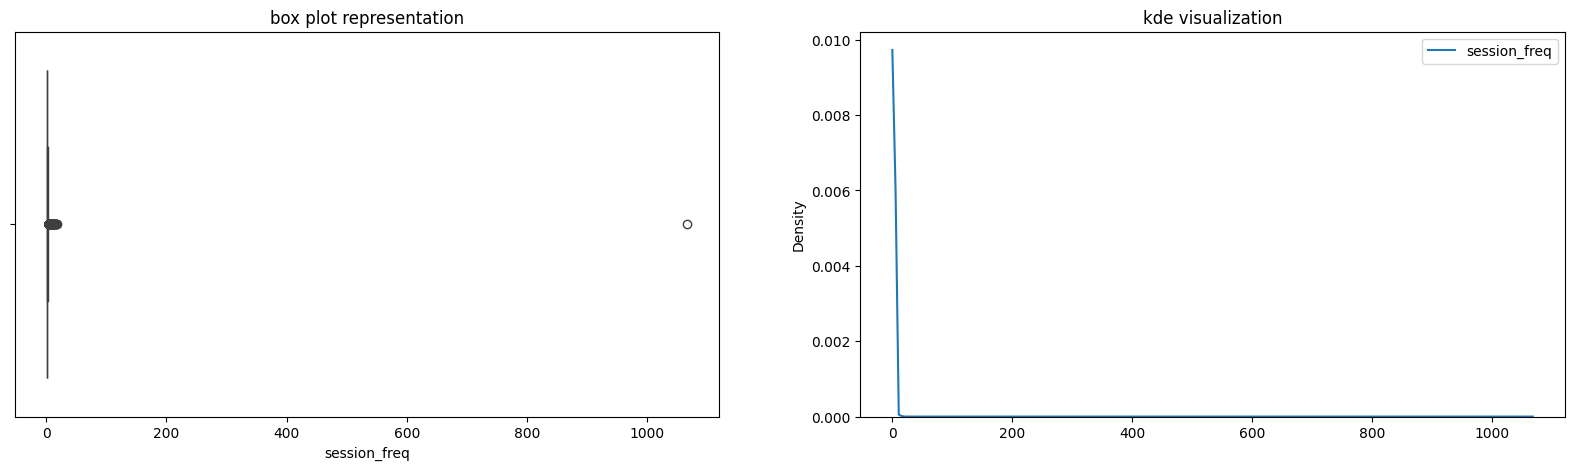

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=user_engagement[['session_freq']],x="session_freq")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=user_engagement[['session_freq']])

plt.show()

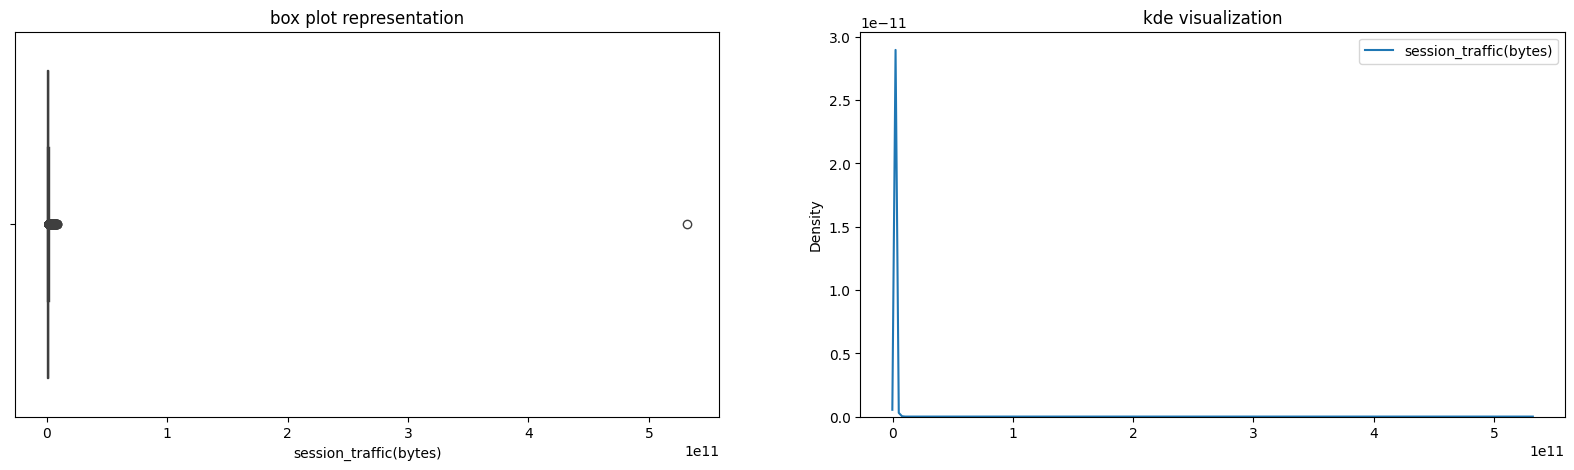

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=user_engagement[['session_traffic(bytes)']],x="session_traffic(bytes)")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=user_engagement[['session_traffic(bytes)']])

plt.show()

In [30]:
# handle outliers
cleaned_engagement_metric = cleaner.handle_outliers(user_engagement, 'session_freq')
cleaned_engagement_metric = cleaner.handle_outliers(cleaned_engagement_metric, 'session_duration(ms)')
cleaned_engagement_metric = cleaner.handle_outliers(cleaned_engagement_metric, 'session_traffic(bytes)')
cleaned_engagement_metric2 = cleaned_engagement_metric.copy()
cleaned_engagement_metric

,session_traffic(bytes),session_duration(ms),session_freq
msisdn/number,,,
3.360100e+10,8.786906e+08,116720.0,1.0
3.360100e+10,1.568596e+08,181230.0,1.0
3.360100e+10,5.959665e+08,134969.0,1.0
3.360101e+10,4.223207e+08,49878.0,1.0
3.360101e+10,1.457411e+09,37104.0,2.0
...,...,...,...
3.379000e+10,7.146416e+08,8810.0,1.0
3.379000e+10,4.803073e+08,140988.0,1.0
3.197021e+12,2.321240e+08,325035.5,1.0


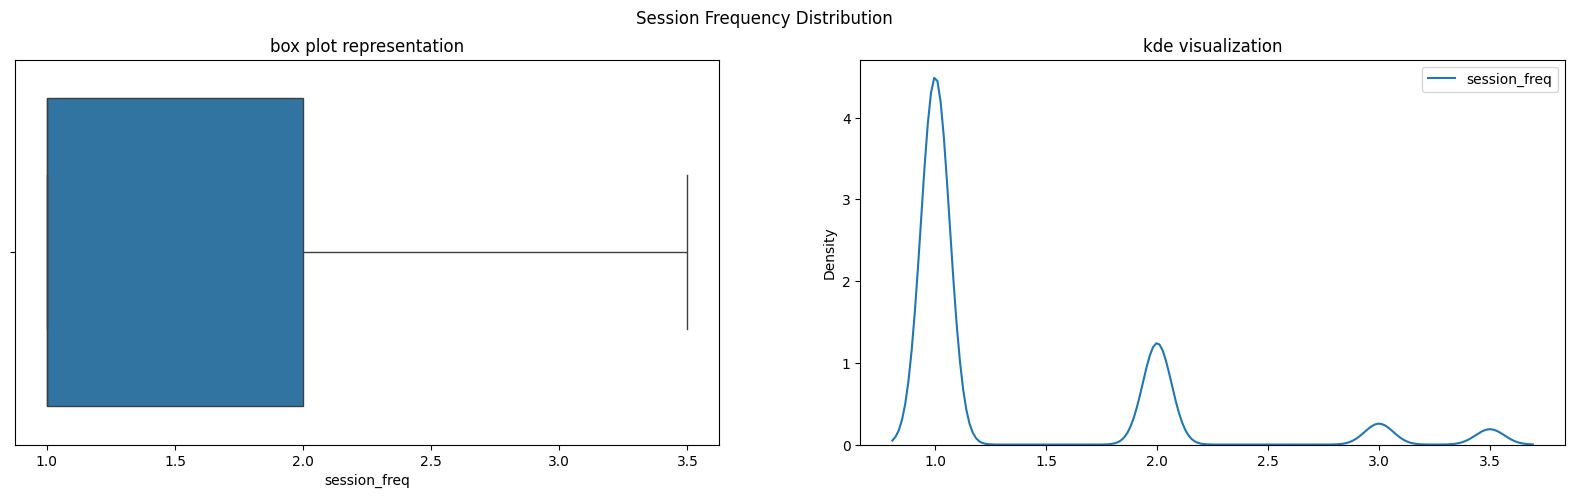

In [31]:
#Data Distribution after handling outliers
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=cleaned_engagement_metric[['session_freq']],x="session_freq")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=cleaned_engagement_metric[['session_freq']])

plt.suptitle("Session Frequency Distribution")
plt.show()

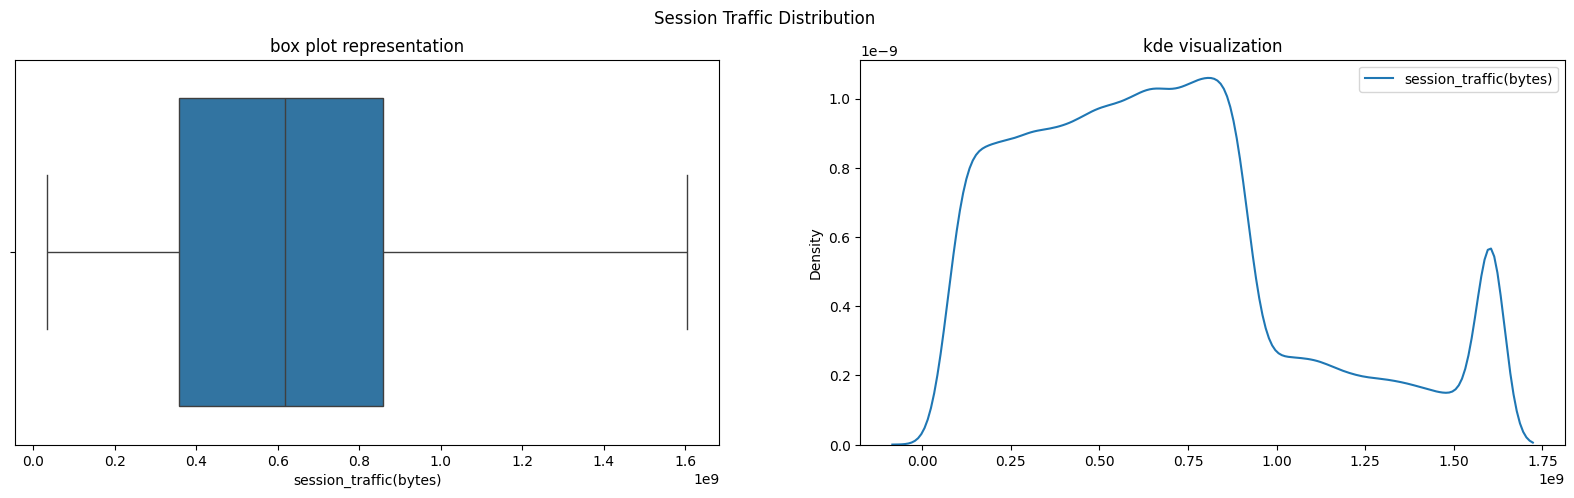

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=cleaned_engagement_metric[['session_traffic(bytes)']],x="session_traffic(bytes)")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=cleaned_engagement_metric[['session_traffic(bytes)']])

plt.suptitle("Session Traffic Distribution")
plt.show()

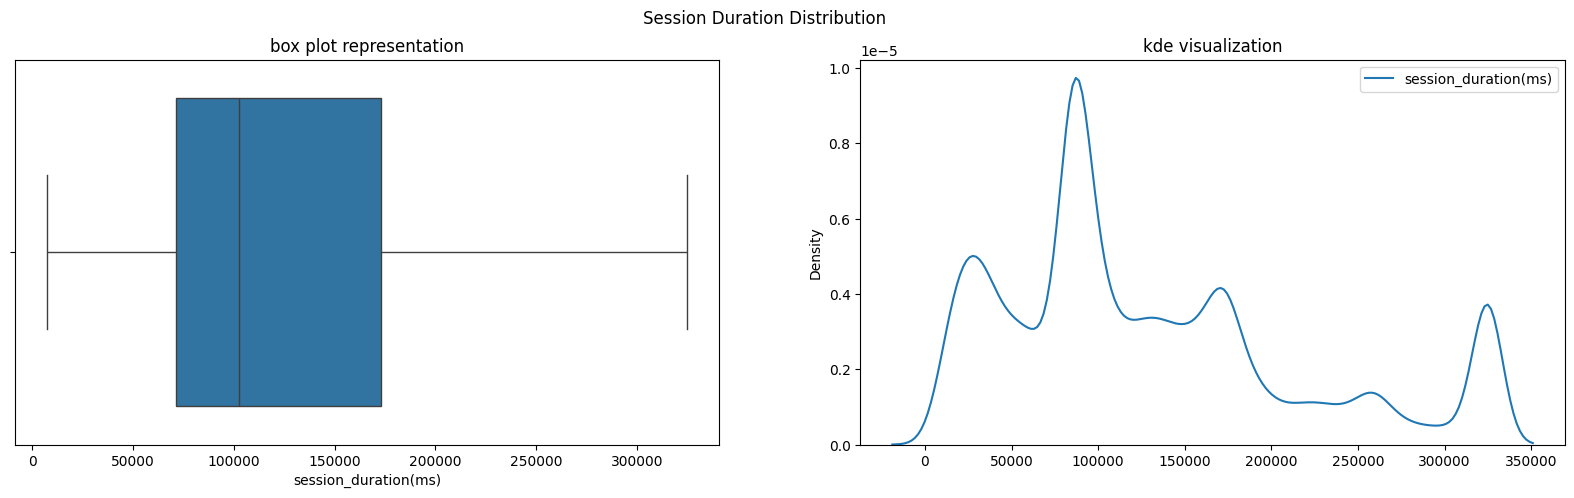

In [33]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1,title="box plot representation")
sns.boxplot(data=cleaned_engagement_metric[['session_duration(ms)']],x="session_duration(ms)")

plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(data=cleaned_engagement_metric[['session_duration(ms)']])

plt.suptitle("Session Duration Distribution")
plt.show()

### Customer clustering (K-means)

In [35]:
# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

normalized_engagement_metric = cleaner.normalizer(cleaned_engagement_metric)
normalized_engagement_metric

,session_traffic(bytes),session_duration(ms),session_freq
0,1.000000,0.000133,1.138057e-09
1,0.999999,0.001155,6.375122e-09
2,1.000000,0.000226,1.677947e-09
3,1.000000,0.000118,2.367869e-09
4,1.000000,0.000025,1.372297e-09
...,...,...,...
106851,1.000000,0.000012,1.399303e-09
106852,1.000000,0.000294,2.082000e-09
106853,0.999999,0.001400,4.308039e-09
106854,1.000000,0.000424,1.677042e-09


In [38]:
kmeans= KMeans(
    init="k-means++",
    n_clusters= 3,
    n_init= 10,
    max_iter= 300,
    random_state=20  
)

In [39]:
model = kmeans.fit(normalized_engagement_metric)
centroids = kmeans.cluster_centers_

In [40]:
with open("../models/engagement_clustering_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [41]:
cleaned_engagement_metric['cluster'] = model.predict(normalized_engagement_metric)
cleaned_engagement_metric.head()

,session_traffic(bytes),session_duration(ms),session_freq,cluster
msisdn/number,,,,
3.360100e+10,8.786906e+08,116720.0,1.0,0
3.360100e+10,1.568596e+08,181230.0,1.0,1
3.360100e+10,5.959665e+08,134969.0,1.0,0
3.360101e+10,4.223207e+08,49878.0,1.0,0
3.360101e+10,1.457411e+09,37104.0,2.0,0


In [42]:
cleaned_engagement_metric.columns

Index(['session_traffic(bytes)', 'session_duration(ms)', 'session_freq',
       'cluster'],
      dtype='object')

c:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\week-1\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


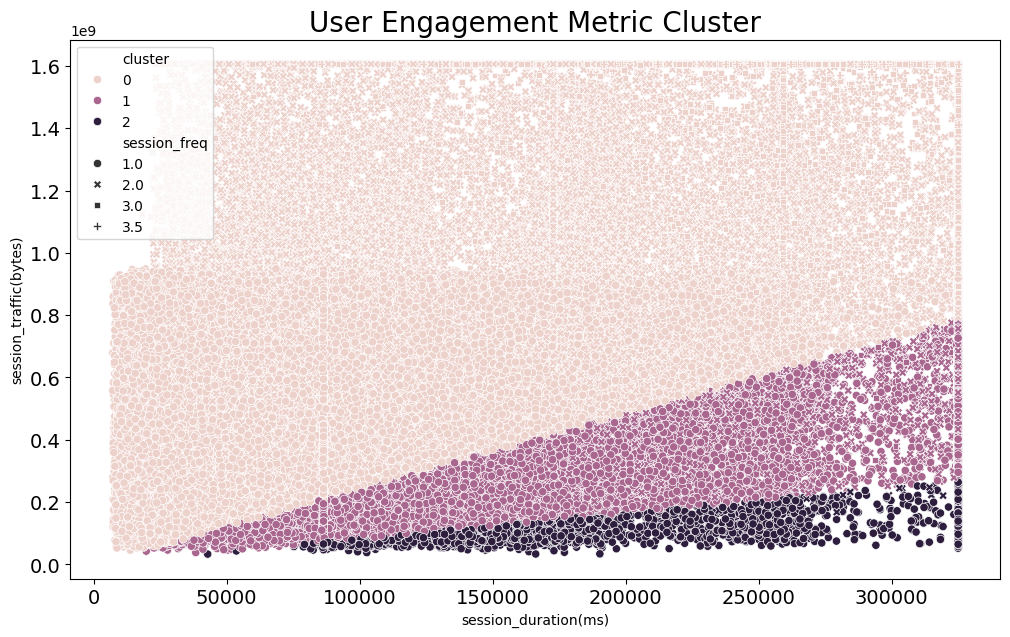

In [51]:
utility.plot_scatter(
    cleaned_engagement_metric,
   'session_duration(ms)',
    'session_traffic(bytes)',
    title = 'User Engagement Metric Cluster',
    hue = 'cluster',
    style = 'session_freq'
      
)

In [52]:
cleaned_engagement_metric.describe()

,session_traffic(bytes),session_duration(ms),session_freq,cluster
count,1.068560e+05,106856.000000,106856.000000,106856.000000
mean,6.636388e+08,130255.887245,1.359605,0.192081
std,3.959342e+08,87614.008636,0.653594,0.447146
min,3.324901e+07,7142.000000,1.000000,0.000000
25%,3.585617e+08,71308.000000,1.000000,0.000000
50%,6.179299e+08,102740.000000,1.000000,0.000000
75%,8.574377e+08,172799.000000,2.000000,0.000000
max,1.605752e+09,325035.500000,3.500000,2.000000


In [53]:
cleaned_engagement_metric.groupby('cluster').agg(['min','max','mean','count','var','std'])

session_traffic(bytes)                                     \
                           min           max          mean  count   
cluster                                                             
0                   46047479.0  1.605752e+09  7.470191e+08  88722   
1                   38022357.0  7.834343e+08  2.769292e+08  15743   
2                   33249009.0  2.683204e+08  1.158779e+08   2391   

                                    session_duration(ms)            \
                  var           std                  min       max   
cluster                                                              
0        1.426167e+17  3.776462e+08               7142.0  325035.5   
1        2.569584e+16  1.602992e+08              19764.0  325035.5   
2        2.056154e+15  4.534483e+07              42856.0  325035.5   

                                                          session_freq       \
                  mean  count           var           std          min  max   
cluster                                                                       
0        122080.988763  88722  7.589819e+09  87119.565476          1.0  3.5   
1        166487.147589  15743  6.236750e+09  78973.094413          1.0  3.5   
2        195042.424927   2391  5.044288e+09  71023.153474          1.0  2.0   

                                              
             mean  count       var       std  
cluster                                       
0        1.408512  88722  0.475636  0.689664  
1        1.135679  15743  0.134938  0.367339  
2        1.019239   2391  0.018877  0.137392

##### Cluster 0
Contains the largest amount of session counts
Contains on average the highest amount of session traffic
This cluster would be ranked as the cluster containing the most engaged users as compared to the other clusters.


##### Cluster 1
Users in this cluster have a lower session frequency as compared to the other clusters. Which also means they have lesser amount of session traffic.
This cluster would be ranked as the cluster containig the least engaged users as compared to the others

##### Cluster 2
has the highest session_traffic, it is ranked in the middle according to its data counts

#### Aggregate User total traffic per application

In [55]:
# derive the top 10 most engaged users per application
# calculate total data (UL and DL) per application

cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']
users_app_engagement=cleaned_df[['msisdn/number','social_media','google','email','youtube','netflix','gaming','other','total_data']]
users_app_engagement.rename(columns={"msisdn/number":"msisdn"},inplace=True)
users_app_engagement

C:\Users\user\AppData\Local\Temp\ipykernel_9676\2571450585.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_app_engagement.rename(columns={"msisdn/number":"msisdn"},inplace=True)


,msisdn,social_media,google,email,youtube,netflix,gaming,other,total_data
0,3.366496e+10,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,3.456294e+08
1,3.368185e+10,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,7.071854e+08
2,3.376063e+10,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,3.076910e+08
3,3.375034e+10,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,8.893527e+08
4,3.369980e+10,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,6.076814e+08
...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,6.318041e+08
149997,3.366345e+10,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,7.057839e+08
149998,3.362189e+10,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,6.276986e+08
149999,3.361962e+10,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,4.015220e+08


In [56]:
users_app_engagement_grouped=users_app_engagement.groupby('msisdn')
users_app_engagement_rank=users_app_engagement_grouped.sum()
users_app_engagement_rank

,social_media,google,email,youtube,netflix,gaming,other,total_data
msisdn,,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0,7.146416e+08
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0,4.803073e+08
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0,2.321240e+08


#### user engagement per app

In [58]:
column_names=sorted(['social_media','google','email','youtube','netflix','gaming'])

for app in column_names:
    print(f"Top 10 {app} Users")
    display(users_app_engagement_rank[[app]].sort_values(by=[app],ascending=False).dropna(axis=0,inplace=False).head(10) )
    print("---------------------------------")

Top 10 email Users


,email
msisdn,
3.366371e+10,2.403622e+09
3.362632e+10,4.241878e+07
3.361489e+10,4.078863e+07
3.362578e+10,4.063397e+07
3.378632e+10,3.631012e+07
3.365973e+10,3.599979e+07
3.376054e+10,3.369377e+07
3.367588e+10,3.151442e+07
3.366546e+10,3.041788e+07


---------------------------------
Top 10 gaming Users


,gaming
msisdn,
3.366371e+10,4.616346e+11
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.362632e+10,6.887572e+09
3.365973e+10,6.725559e+09
3.366646e+10,6.646303e+09
3.376041e+10,6.268620e+09


---------------------------------
Top 10 google Users


,google
msisdn,
3.366371e+10,8.250702e+09
3.362632e+10,1.521919e+08
3.362578e+10,1.423079e+08
3.361489e+10,1.279738e+08
3.376054e+10,1.232231e+08
3.365973e+10,1.165163e+08
3.378632e+10,1.102545e+08
3.367588e+10,1.098605e+08
3.366716e+10,1.050327e+08


---------------------------------
Top 10 netflix Users


,netflix
msisdn,
3.366371e+10,2.428211e+10
3.365973e+10,3.995191e+08
3.361489e+10,3.614010e+08
3.362578e+10,3.569806e+08
3.376054e+10,3.346433e+08
3.362632e+10,3.287257e+08
3.376041e+10,3.183475e+08
3.366716e+10,3.139395e+08
3.367588e+10,3.090932e+08


---------------------------------
Top 10 social_media Users


,social_media
msisdn,
3.366371e+10,1.974199e+09
3.362632e+10,4.337478e+07
3.376054e+10,3.978319e+07
3.365973e+10,3.541236e+07
3.361489e+10,2.829454e+07
3.362578e+10,2.713550e+07
3.366716e+10,2.424785e+07
3.378632e+10,2.397492e+07
3.366907e+10,2.380083e+07


---------------------------------
Top 10 youtube Users


,youtube
msisdn,
3.366371e+10,2.435073e+10
3.362578e+10,4.529588e+08
3.376054e+10,3.962892e+08
3.361489e+10,3.943702e+08
3.362632e+10,3.744830e+08
3.367588e+10,3.174106e+08
3.366716e+10,3.152313e+08
3.362708e+10,3.087908e+08
3.376041e+10,3.031691e+08


---------------------------------


#### Top 3 most used apps

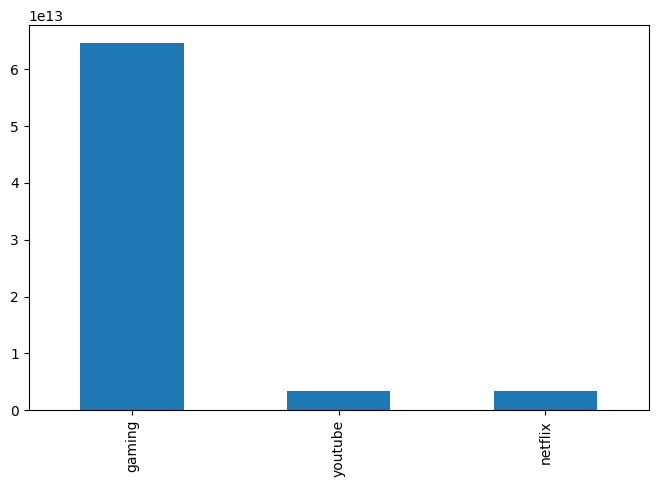

In [59]:
total_user_engagement=users_app_engagement_rank[column_names].agg(['sum'])
plt.figure(figsize=(8,5))
# transpose data to make app names indicies
total_user_engagement=total_user_engagement.T['sum']
bar_df=total_user_engagement.sort_values(ascending=False)[:3]
bar_df.plot(kind='bar')
plt.show()

We're going to use the elbow method to determine the appropriate number of cluster. We're going to run several iterations of K-means and we're going to record the sum of squared errors(SSE)

In [60]:
kmeans_kwargs= {
    'init':"k-means++",
    'n_init': 10,
    'max_iter': 300,
    'random_state':20  
}

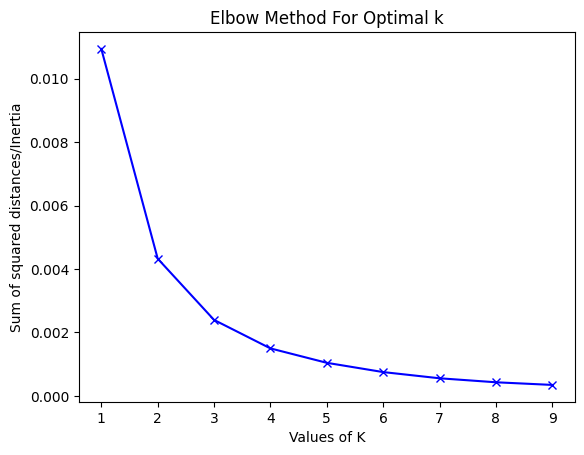

In [61]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,**kmeans_kwargs)
 kmeans.fit(normalized_engagement_metric)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
# with kneed we can determine the optimum number of clusters
kl = KneeLocator(range(1,10), Sum_of_squared_distances, curve='convex', direction='decreasing')
kl.elbow

3

The elbow method shows us that the sum of the squared errors will decrease the rate of descent after the optimum number of cluster as shown in the plot above. We have verified that the optimum number of cluster is 3 both graphically and programmatically.

In [69]:
cleaned_engagement_metric

,session_traffic(bytes),session_duration(ms),session_freq,cluster
msisdn/number,,,,
3.360100e+10,8.786906e+08,116720.0,1.0,0
3.360100e+10,1.568596e+08,181230.0,1.0,1
3.360100e+10,5.959665e+08,134969.0,1.0,0
3.360101e+10,4.223207e+08,49878.0,1.0,0
3.360101e+10,1.457411e+09,37104.0,2.0,0
...,...,...,...,...
3.379000e+10,7.146416e+08,8810.0,1.0,0
3.379000e+10,4.803073e+08,140988.0,1.0,0
3.197021e+12,2.321240e+08,325035.5,1.0,2


In [70]:
centroids.shape

(3, 3)

In [71]:
centroids

array([[9.99999980e-01, 1.72701147e-04, 2.21650261e-09],
       [9.99999763e-01, 6.57023081e-04, 5.23483977e-09],
       [9.99998254e-01, 1.76521573e-03, 9.98811223e-09]])

In [72]:
centroids_df = pd.DataFrame(centroids, columns=['session_traffic(bytes)', 'session_freq', 'session_duration(ms)'])
centroids_df

,session_traffic(bytes),session_freq,session_duration(ms)
0,1.000000,0.000173,2.216503e-09
1,1.000000,0.000657,5.234840e-09
2,0.999998,0.001765,9.988112e-09


In [73]:
kmeans_2 = KMeans(n_clusters=3, init='k-means++').fit(normalized_engagement_metric)
pred = kmeans_2.predict(normalized_engagement_metric)

cleaned_engagement_metric2['cluster'] = pred

c:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\week-1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
distance = kmeans.fit_transform(normalized_engagement_metric)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

cleaned_engagement_metric2['score'] = distance_from_less_engagement
cleaned_engagement_metric2.head()

,session_traffic(bytes),session_duration(ms),session_freq,cluster,score
msisdn/number,,,,,
3.360100e+10,8.786906e+08,116720.0,1.0,2,0.000057
3.360100e+10,1.568596e+08,181230.0,1.0,0,0.000965
3.360100e+10,5.959665e+08,134969.0,1.0,2,0.000036
3.360101e+10,4.223207e+08,49878.0,1.0,2,0.000072
3.360101e+10,1.457411e+09,37104.0,2.0,2,0.000165


In [75]:
agg_data = {}
agg_data['top_ten_per_traffic'] = top_10_per_traffic
agg_data['top_ten_per_freq'] = top_10_per_freq
# agg_data['top_ten_customers_per_metric'] = top_10_customers_per_metric
agg_data['top_ten_per_duration'] = top_10_per_duration
pickle.dump(agg_data, open('../data/engagement_data.pkl', 'wb'))